# Python for Data Analysis Lightning Tutorials
## Pandas Cookbook Series

**Python for Data Analysis Lightning Tutorials** is a series of tutorials in Data Analysis, Statistics, and Graphics using Python. The **Pandas Cookbook** series of tutorials provides recipes for common tasks and moves on to more advanced topics in statistics and time series analysis. 

<i>Created by Alfred Essa</i>, June 15th, 2014 

Note: IPython Notebook and Data files can be found at my Github Site: http://github/alfredessa


### 5.1 Introduction

In this tutorial we learn to do some basic descriptive statistics in Pandas

### 5.11 Preliminaries

In [1]:
# Load pandas and numpy libraries
import pandas as pd
import numpy as np

 

In [2]:
# Set default option for Pandas
pd.set_option('display.max_rows',20)

In [3]:
# Plot inline in notebook
%pylab inline


Populating the interactive namespace from numpy and matplotlib


### 5.12 Read Automobile Dataset

In [4]:
# Read dataset
auto = pd.read_csv('data/auto.csv')

 

In [5]:
# Show first lines of data
auto.head()
 

,make,price,mpg,repairs,weight,length,foreign
0,AMC,4099,22,3,2930,186,0
1,AMC,4749,17,3,3350,173,0
2,AMC,3799,22,3,2640,168,0
3,Audi,9690,17,5,2830,189,1
4,Audi,6295,23,3,2070,174,1


### 5.13 Basic Statistics and Visualizations

In [6]:
# describe provides basic statistics
auto.describe()
 

,price,mpg,repairs,weight,length,foreign
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,6651.730769,20.923077,3.269231,3099.230769,190.076923,0.269231
std,3371.119809,4.757504,0.777570,695.079409,18.170136,0.452344
min,3299.000000,14.000000,2.000000,2020.000000,163.000000,0.000000
25%,4465.750000,17.250000,3.000000,2642.500000,173.250000,0.000000
50%,5146.500000,21.000000,3.000000,3200.000000,191.000000,0.000000
75%,8053.500000,23.000000,4.000000,3610.000000,203.000000,0.750000
max,15906.000000,35.000000,5.000000,4330.000000,222.000000,1.000000


In [7]:
# choose an individual column
auto.mpg.describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
Name: mpg, dtype: float64

In [8]:
# variant notation
auto['mpg'].describe()

count    26.000000
mean     20.923077
std       4.757504
min      14.000000
25%      17.250000
50%      21.000000
75%      23.000000
max      35.000000
Name: mpg, dtype: float64

In [10]:
# median is not part of describe but is available
auto.mpg.std()

4.7575041937812488

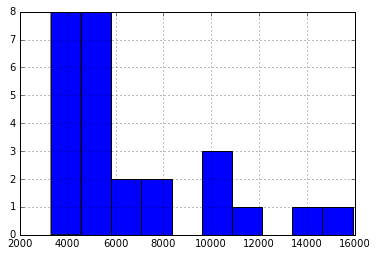

In [9]:
# plot a histogram
auto.price.hist()
 

/Users/mac/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x10ef652e8>],
 'caps': [<matplotlib.lines.Line2D at 0x10ef6fc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x10ef73dd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x10ef735c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x10ef5df98>,
  <matplotlib.lines.Line2D at 0x10ef65cf8>]}

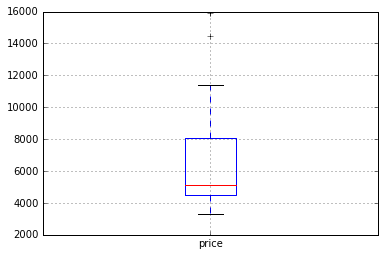

In [10]:
#box plot
auto.boxplot(column='price')

### 5.14 Groupby

In [11]:
titanic = pd.read_csv('data/titanic.csv')

In [12]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [13]:
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


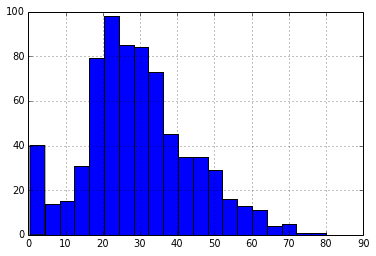

In [18]:
titanic.Age.hist(bins=20)

In [19]:
grouped = titanic.groupby('Sex')

In [20]:
grouped.Age.median()

Sex
female    27
male      29
Name: Age, dtype: float64

In [21]:
grouped.Age.describe()

Sex          
female  count    261.000000
        mean      27.915709
        std       14.110146
        min        0.750000
        25%       18.000000
        50%       27.000000
        75%       37.000000
        max       63.000000
male    count    453.000000
        mean      30.726645
        std       14.678201
        min        0.420000
        25%       21.000000
        50%       29.000000
        75%       39.000000
        max       80.000000
dtype: float64

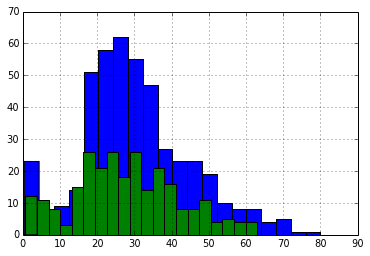

In [24]:
grouped.get_group('male').Age.hist(bins=20)
grouped.get_group('female').Age.hist(bins=20)

{'female': {'boxes': [<matplotlib.lines.Line2D at 0x111934f90>],
  'caps': [<matplotlib.lines.Line2D at 0x111930250>,
  'fliers': [<matplotlib.lines.Line2D at 0x111937c50>,
  'medians': [<matplotlib.lines.Line2D at 0x111937610>],
  'whiskers': [<matplotlib.lines.Line2D at 0x111934450>,
   <matplotlib.lines.Line2D at 0x111930590>]},
 'male': {'boxes': [<matplotlib.lines.Line2D at 0x111941450>],
  'caps': [<matplotlib.lines.Line2D at 0x11193e790>,
  'fliers': [<matplotlib.lines.Line2D at 0x111943110>,
  'medians': [<matplotlib.lines.Line2D at 0x111941a90>],
  'whiskers': [<matplotlib.lines.Line2D at 0x11193bd90>,
   <matplotlib.lines.Line2D at 0x11193e0d0>]}}

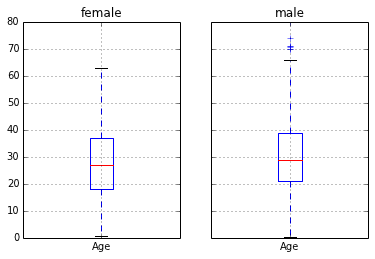

In [25]:
grouped.boxplot(column='Age')